#### TEXT CAPTCHA BREAKING SYSTEM

In [1]:
!pip install captcha

     |████████████████████████████████| 101 kB 1.2 MB/s 


In [2]:
# import module we'll need to import our custom module
from shutil import copyfile

# copy our file into the working directory (make sure it has .py suffix)
copyfile(src = "../input/data4/CNN_Model.py", dst = "../working/CNN_Model.py")
copyfile(src = "../input/data3/Captcha_Sequence_Generator.py", dst = "../working/Captcha_Sequence_Generator.py")
copyfile(src = "../input/data3/Utils_funX.py", dst = "../working/Utils_funX.py")


'../working/Utils_funX.py'

In [3]:
import string
import pandas as pd
from keras import *
import numpy as np
import tensorflow as tf 
import tensorflow.compat.v1.keras.backend as Keras_backend
from keras.utils import Sequence
from captcha.image import ImageCaptcha
#configure the session to prevent tensorflow from occupying all the video memmory
config = tf.compat.v1.ConfigProto() 
config.gpu_options.allow_growth=True
session= tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

#### Data Generator Demostration

In [4]:
from Captcha_Sequence_Generator import Captcha_Sequence_Generator
characters = string.digits + string.ascii_uppercase + string.ascii_lowercase
#Demostration
Data = Captcha_Sequence_Generator(characters,batch_size=1,steps=1)

In [5]:
X_val,Y_val=Data[0]

In [6]:
print(X_val.shape)
X_val

(1, 64, 128, 3)


array([[[[0.9607843 , 0.98039216, 1.        ],
         [0.9607843 , 0.98039216, 1.        ],
         [0.9607843 , 0.98039216, 1.        ],
         ...,
         [0.38431373, 0.22745098, 0.12941177],
         [0.38431373, 0.22745098, 0.12941177],
         [0.9607843 , 0.98039216, 1.        ]],

        [[0.9607843 , 0.98039216, 1.        ],
         [0.9607843 , 0.98039216, 1.        ],
         [0.9607843 , 0.98039216, 1.        ],
         ...,
         [0.5176471 , 0.4       , 0.32941177],
         [0.827451  , 0.80784315, 0.8       ],
         [0.9607843 , 0.98039216, 1.        ]],

        [[0.9607843 , 0.98039216, 1.        ],
         [0.9607843 , 0.98039216, 1.        ],
         [0.9607843 , 0.98039216, 1.        ],
         ...,
         [0.827451  , 0.80784315, 0.8       ],
         [0.91764706, 0.92156863, 0.93333334],
         [0.9607843 , 0.98039216, 1.        ]],

        ...,

        [[0.9607843 , 0.98039216, 1.        ],
         [0.9607843 , 0.98039216, 1.        ]

In [7]:
Y_val

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
       dtype=uint8),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=uint8),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=uint8),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=uint8),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
from Utils_funX import Decode_Y_Val
y_decoded,char_classes=Decode_Y_Val(Y_val,characters)
char_classes,y_decoded

(array([56, 10, 11, 23, 55]), 'uABNt')

Text(0.5, 1.0, 'uABNt')

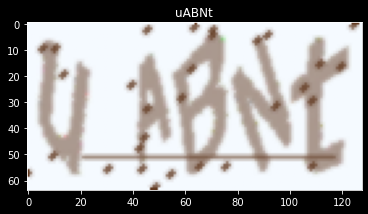

In [9]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.imshow(X_val[0])
plt.title(y_decoded)

#### Convolutional Neural Network Model 

In [10]:
from CNN_Model import *

In [11]:
height=64 ;
width =128 ;
n_classes = len(characters) # 26+26+10 = 52 characters
n_len = 5;

In [12]:
model=CNN_Model_Initialize(height,width,n_classes,n_len)

##### Summary Of Model

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 128, 3)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 128, 32)  896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 128, 32)  128         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 128, 32)  9248        batch_normalization[0][0]        
_______________________________________________________________________________________

##### Visualize the model 

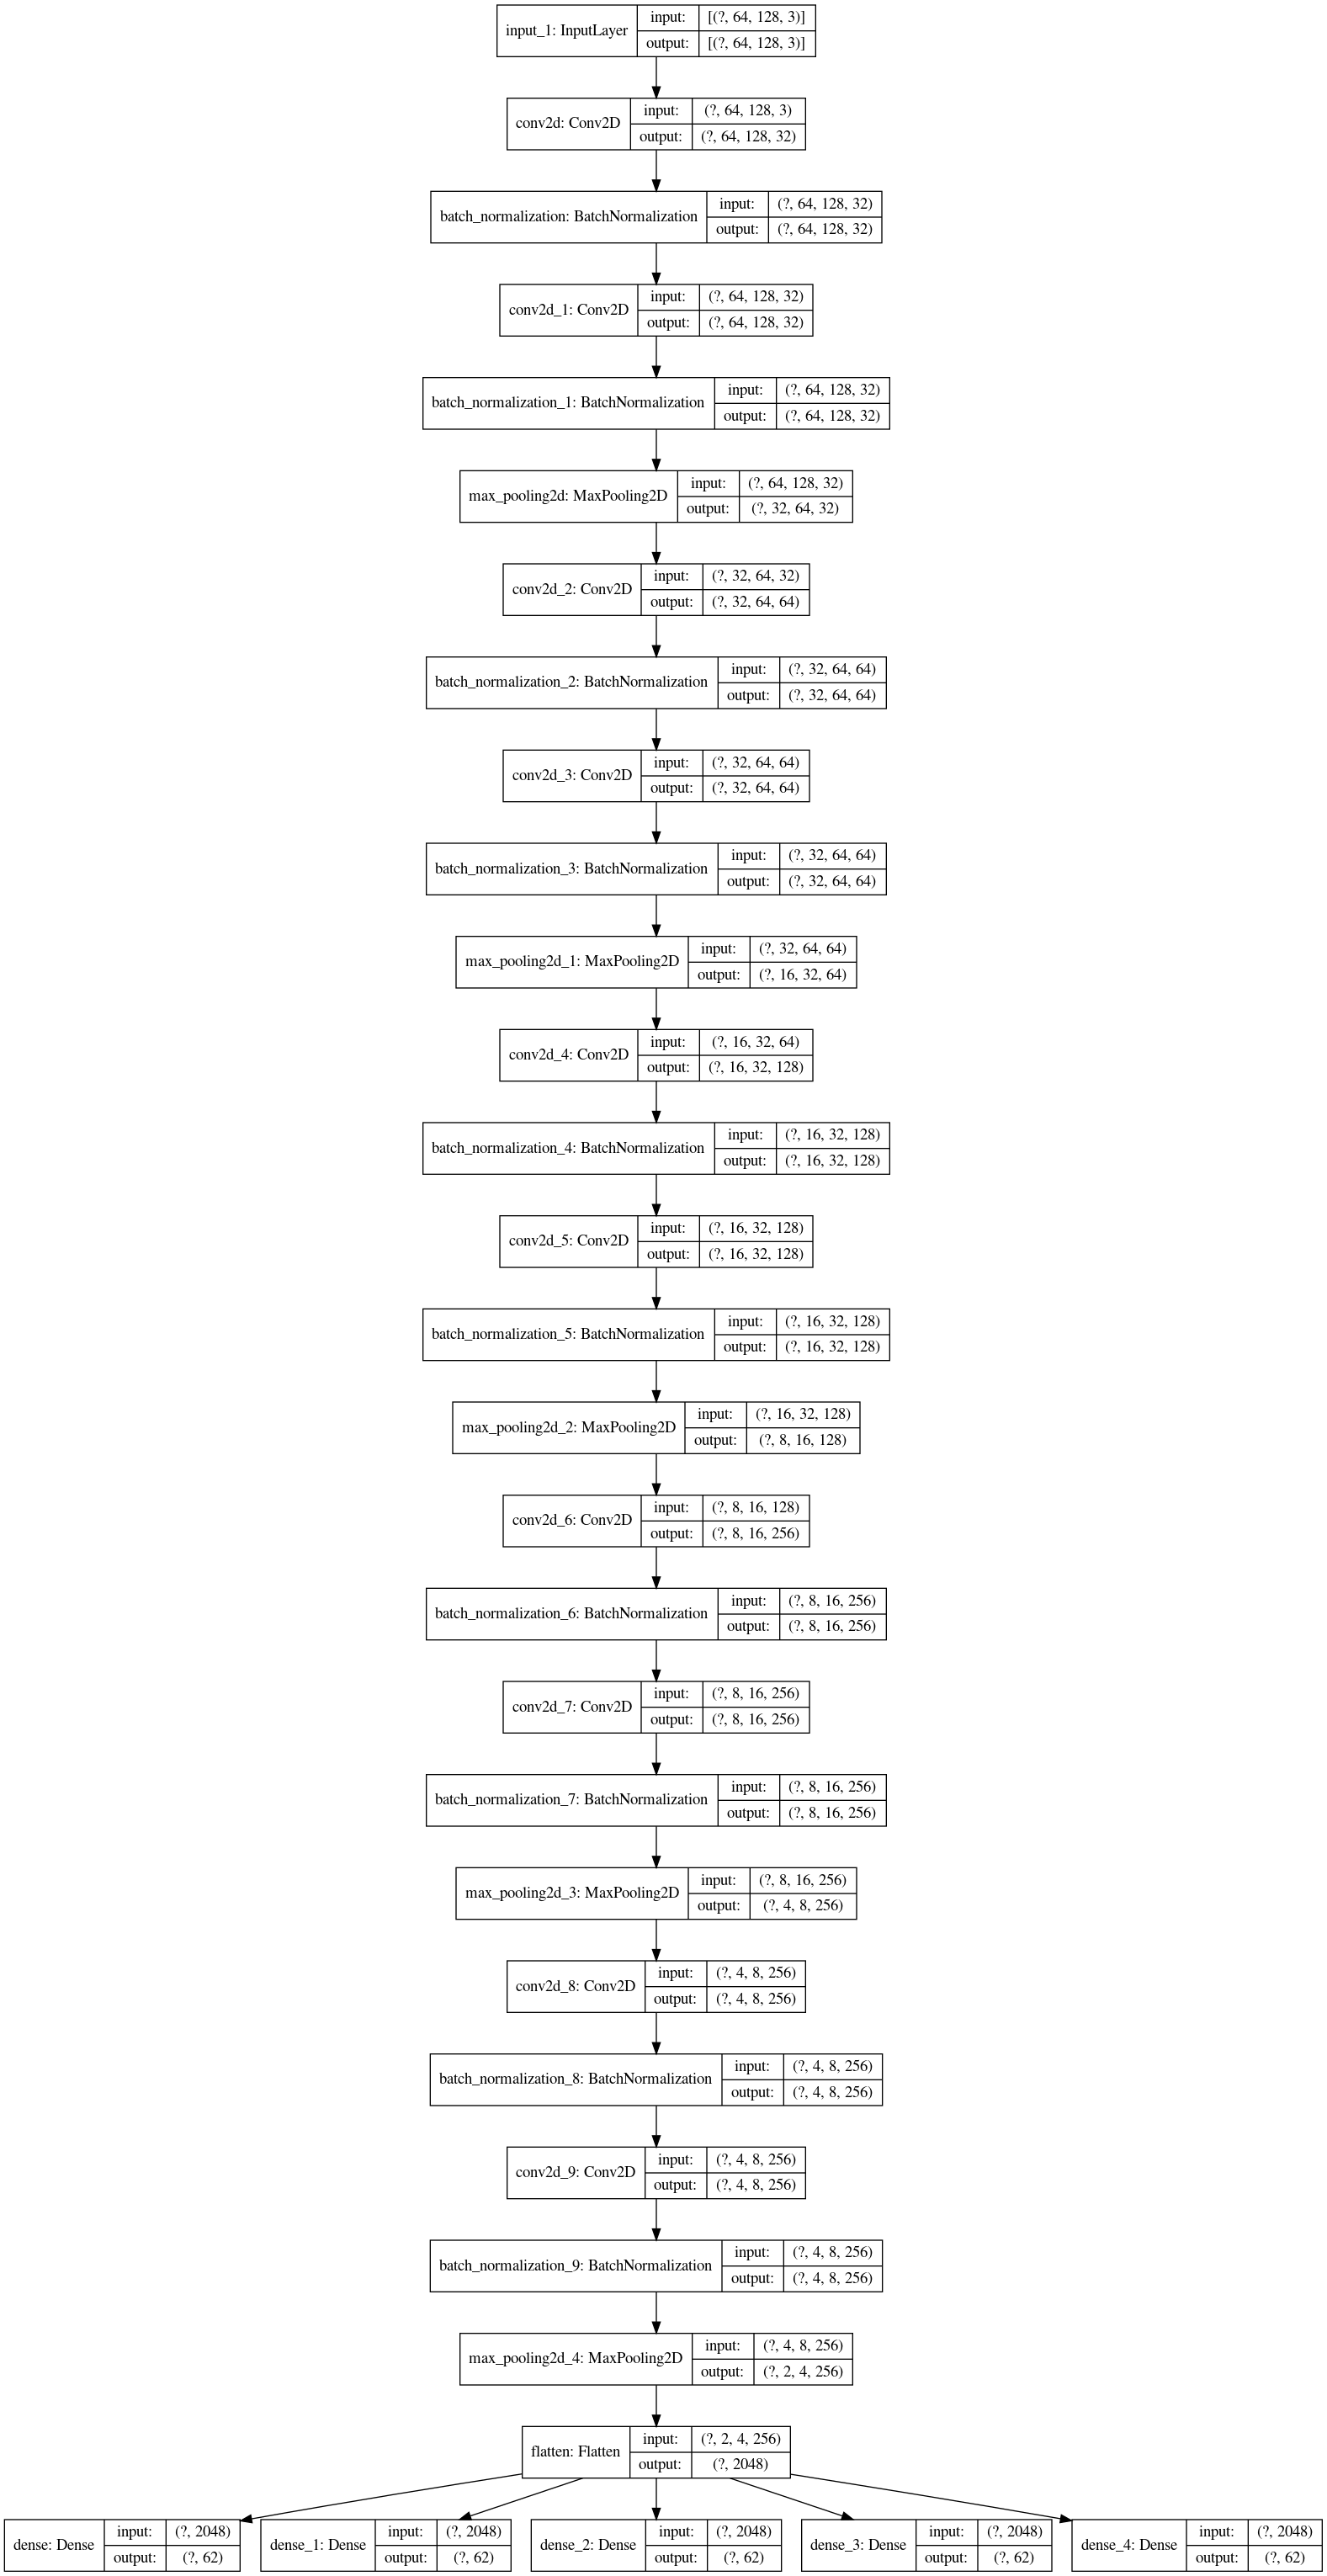

In [14]:
CNN_model_visualize(model)

##### Generating the Train and Test data

In [15]:
Train_data = Captcha_Sequence_Generator(characters,batch_size=128,steps=1000)
Test_data = Captcha_Sequence_Generator(characters,batch_size=128,steps=100)

##### Compile and Train Model

In [16]:
history=CNN_model_Compile_and_Train(model,Train_data,Test_data,train_num=1)

Epoch 1/100
1000/1000 [==============================] - 641s 641ms/step - loss: 7.4035 - dense_loss: 1.2675 - dense_1_loss: 1.6180 - dense_2_loss: 1.7064 - dense_3_loss: 1.5729 - dense_4_loss: 1.2387 - dense_accuracy: 0.6861 - dense_1_accuracy: 0.6013 - dense_2_accuracy: 0.5747 - dense_3_accuracy: 0.6105 - dense_4_accuracy: 0.6964 - val_loss: 1.8997 - val_dense_loss: 0.2557 - val_dense_1_loss: 0.4603 - val_dense_2_loss: 0.4216 - val_dense_3_loss: 0.4621 - val_dense_4_loss: 0.3000 - val_dense_accuracy: 0.9245 - val_dense_1_accuracy: 0.8830 - val_dense_2_accuracy: 0.8763 - val_dense_3_accuracy: 0.8833 - val_dense_4_accuracy: 0.9195
Epoch 2/100
1000/1000 [==============================] - 648s 648ms/step - loss: 0.7869 - dense_loss: 0.1159 - dense_1_loss: 0.1832 - dense_2_loss: 0.2016 - dense_3_loss: 0.1741 - dense_4_loss: 0.1120 - dense_accuracy: 0.9616 - dense_1_accuracy: 0.9403 - dense_2_accuracy: 0.9345 - dense_3_accuracy: 0.9434 - dense_4_accuracy: 0.9625 - val_loss: 0.6838 - val_de

In [17]:
#train the model again after loading the weights from the saved model --> with reduced Learning Rate for better Convergence --> increase the over all Accuracy of Our Model
model.load_weights("CNN_Model.h5")
history=CNN_model_Compile_and_Train(model,Train_data,Test_data,train_num=2)

Epoch 1/100
1000/1000 [==============================] - 683s 683ms/step - loss: 0.1848 - dense_loss: 0.0296 - dense_1_loss: 0.0417 - dense_2_loss: 0.0437 - dense_3_loss: 0.0415 - dense_4_loss: 0.0283 - dense_accuracy: 0.9886 - dense_1_accuracy: 0.9850 - dense_2_accuracy: 0.9846 - dense_3_accuracy: 0.9852 - dense_4_accuracy: 0.9894 - val_loss: 0.1714 - val_dense_loss: 0.0263 - val_dense_1_loss: 0.0362 - val_dense_2_loss: 0.0426 - val_dense_3_loss: 0.0401 - val_dense_4_loss: 0.0262 - val_dense_accuracy: 0.9896 - val_dense_1_accuracy: 0.9854 - val_dense_2_accuracy: 0.9850 - val_dense_3_accuracy: 0.9862 - val_dense_4_accuracy: 0.9905
Epoch 2/100
1000/1000 [==============================] - 707s 707ms/step - loss: 0.1673 - dense_loss: 0.0276 - dense_1_loss: 0.0372 - dense_2_loss: 0.0399 - dense_3_loss: 0.0364 - dense_4_loss: 0.0262 - dense_accuracy: 0.9896 - dense_1_accuracy: 0.9862 - dense_2_accuracy: 0.9854 - dense_3_accuracy: 0.9866 - dense_4_accuracy: 0.9900 - val_loss: 0.1628 - val_de

In [18]:
model.save('CNN_Model.h5', include_optimizer=False)

##### Testing the Model

In [21]:
model=models.load_model("CNN_Model.h5")

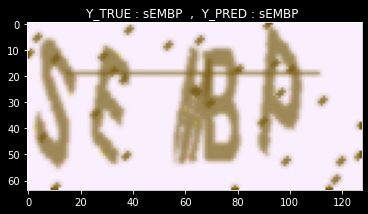

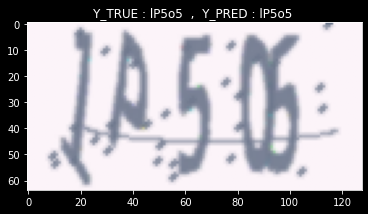

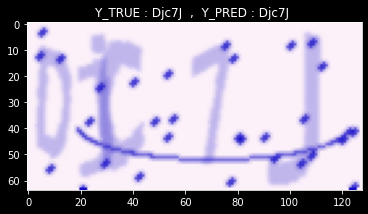

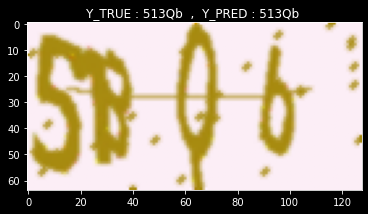

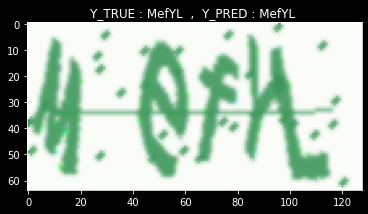

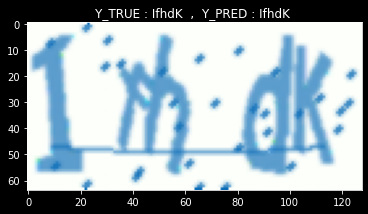

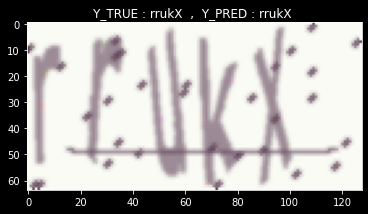

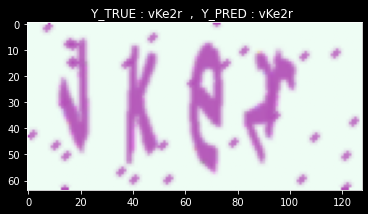

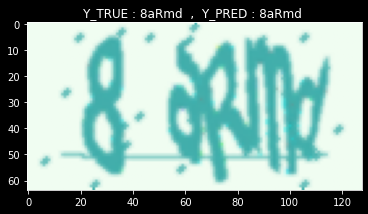

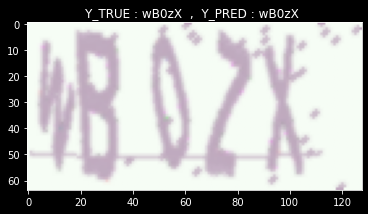

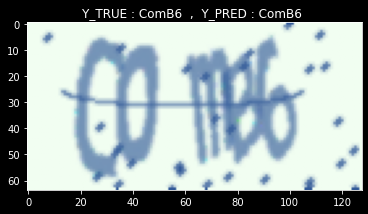

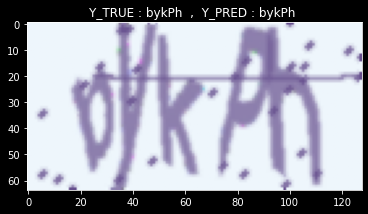

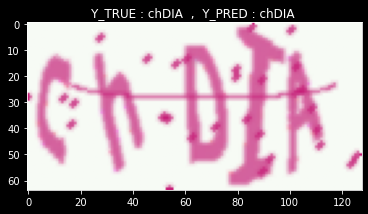

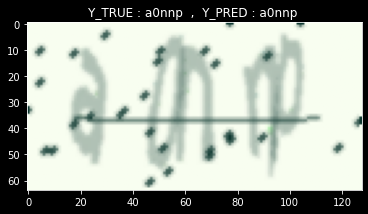

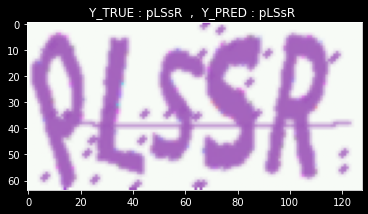

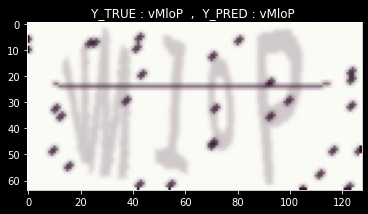

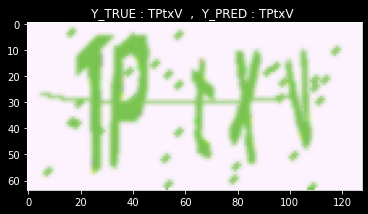

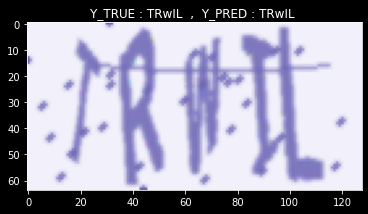

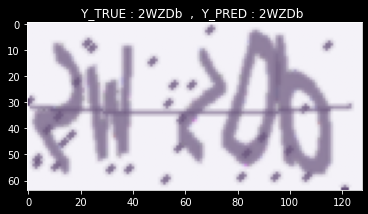

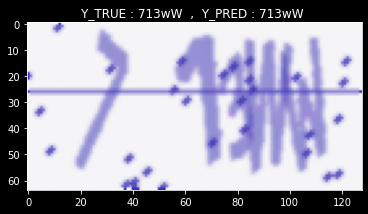

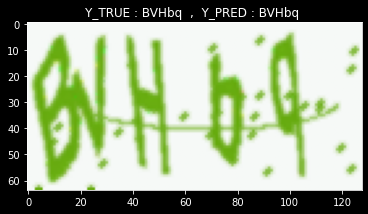

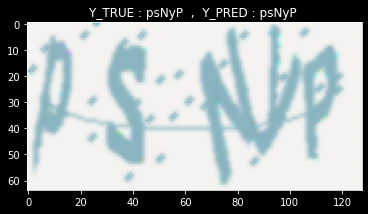

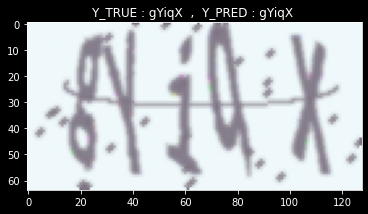

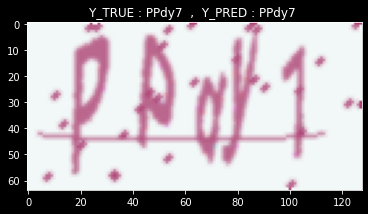

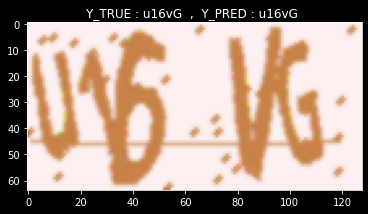

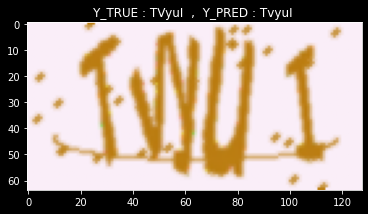

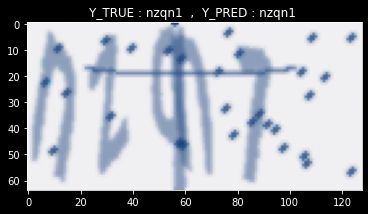

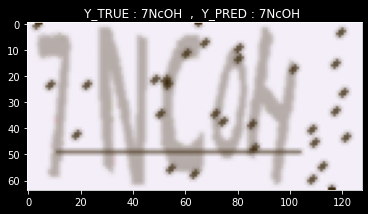

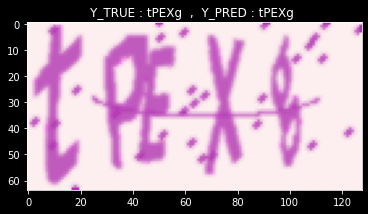

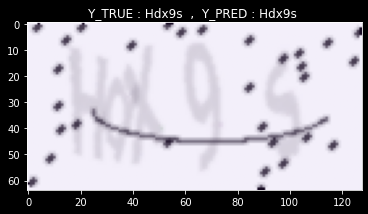

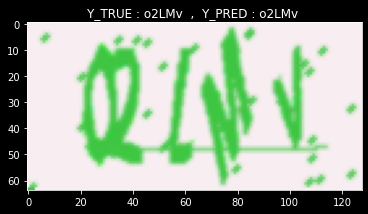

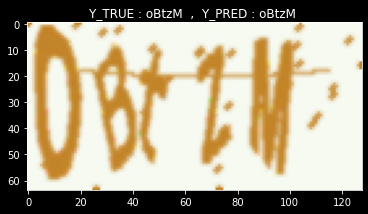

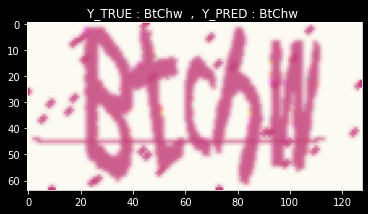

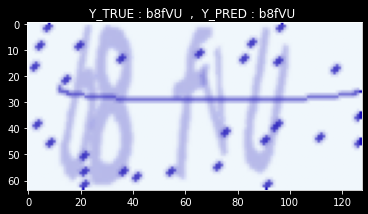

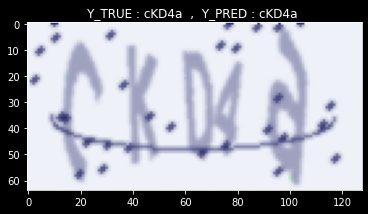

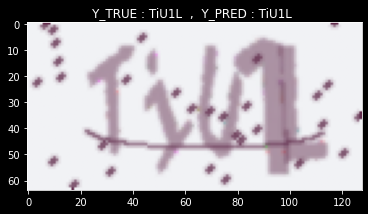

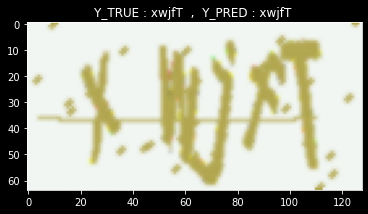

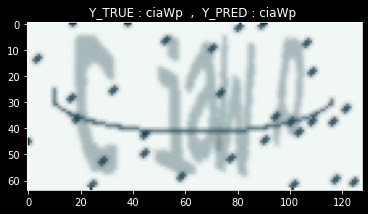

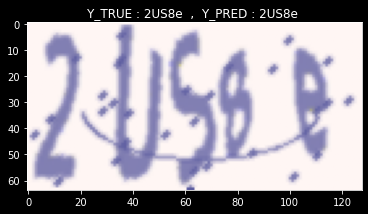

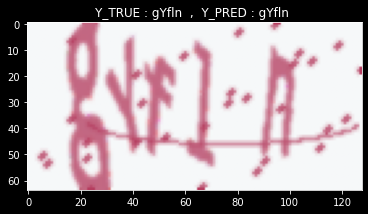

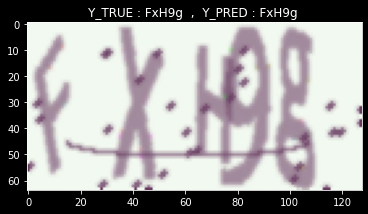

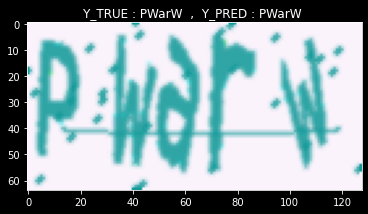

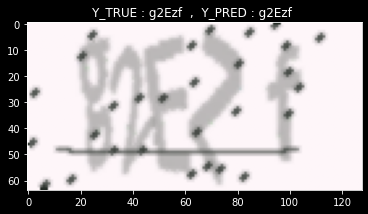

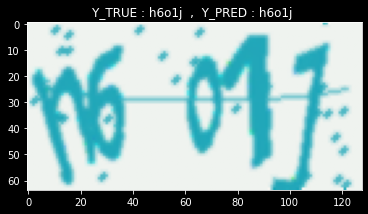

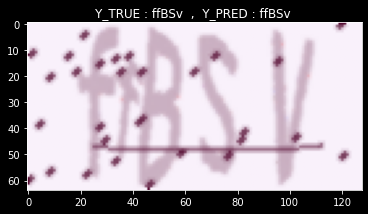

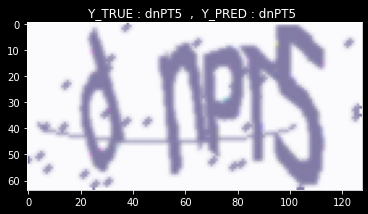

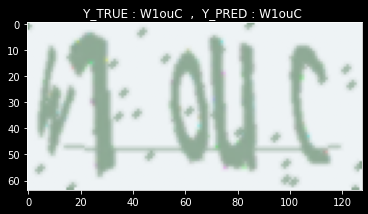

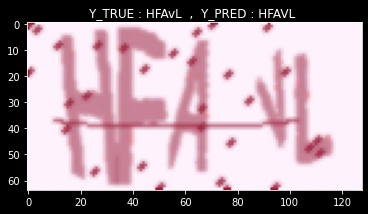

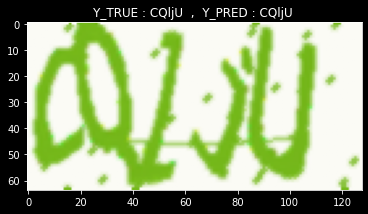

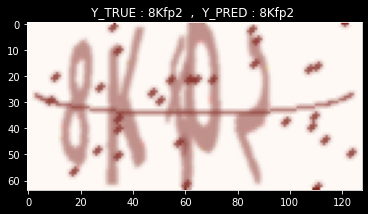

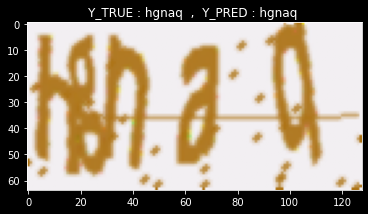

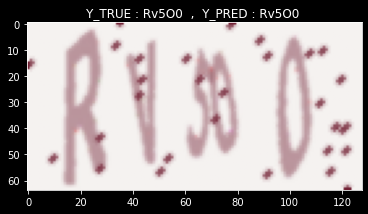

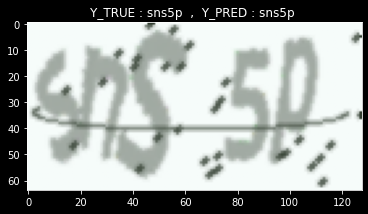

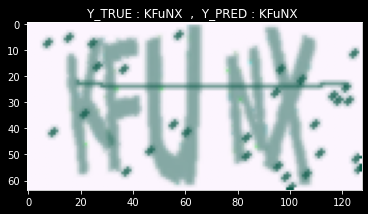

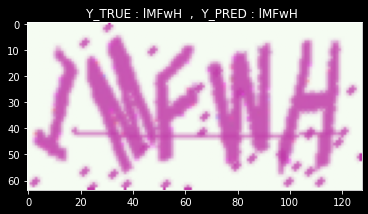

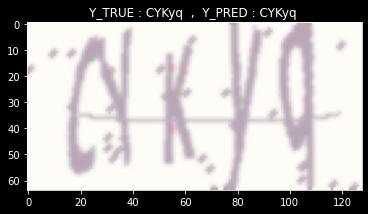

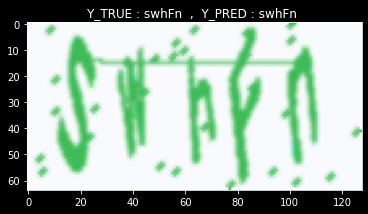

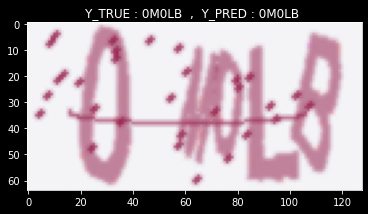

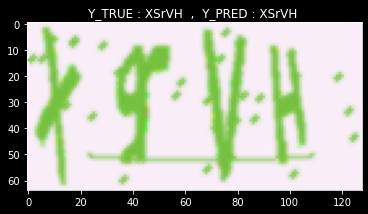

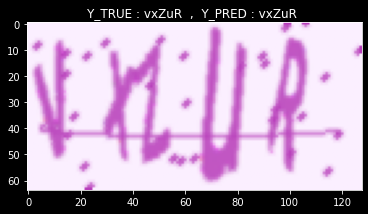

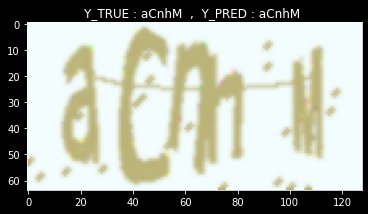

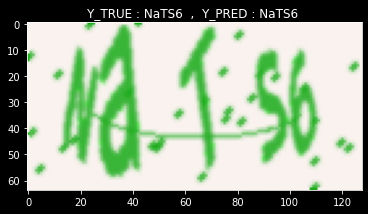

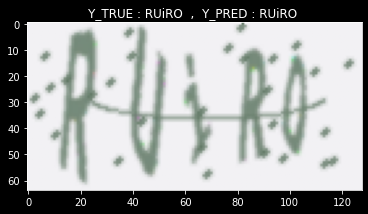

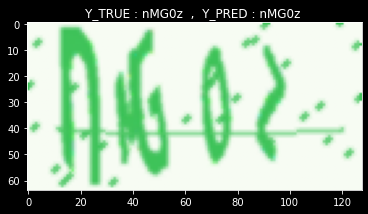

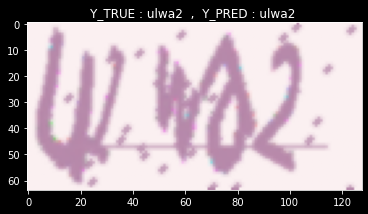

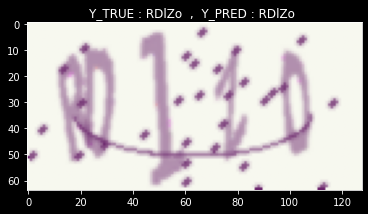

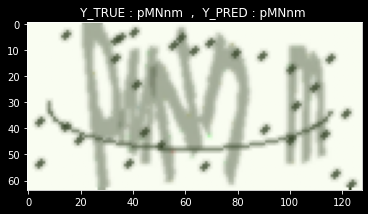

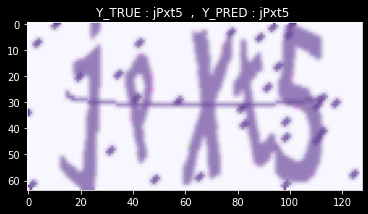

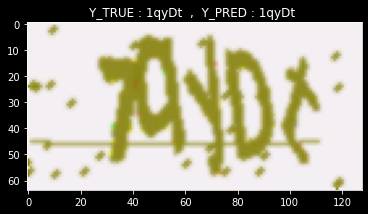

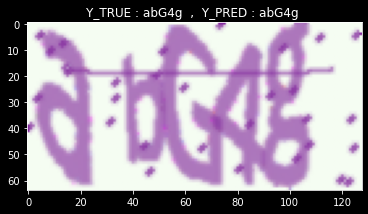

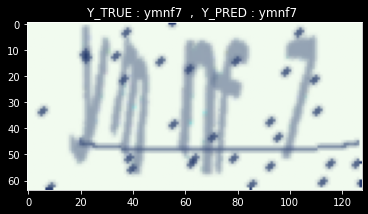

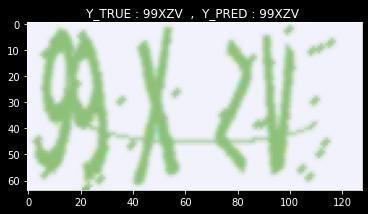

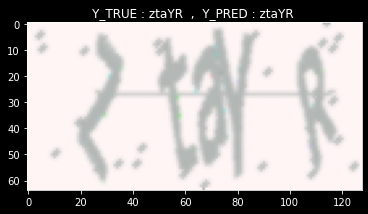

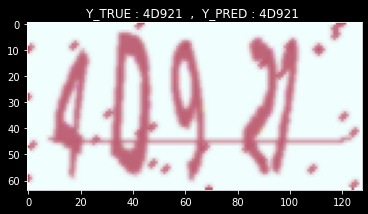

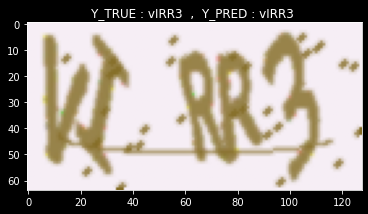

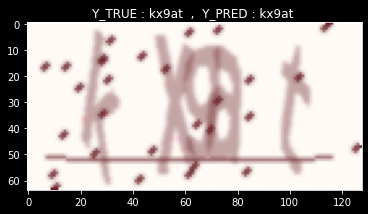

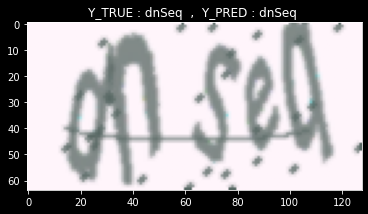

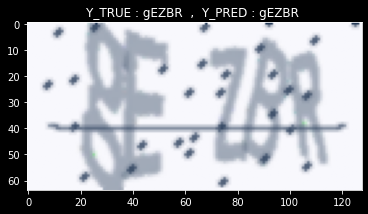

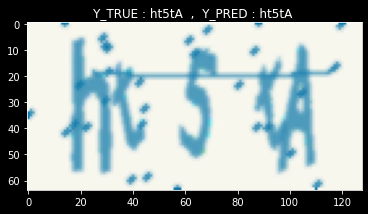

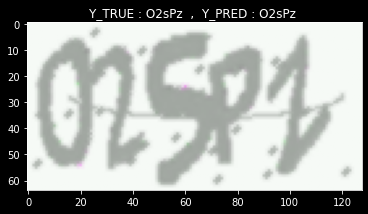

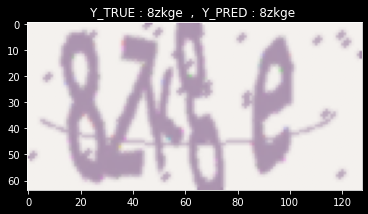

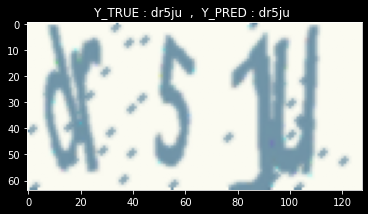

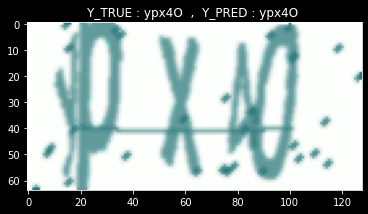

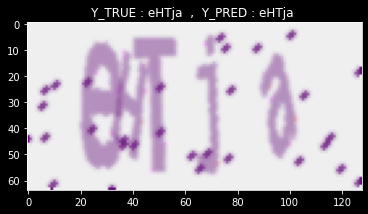

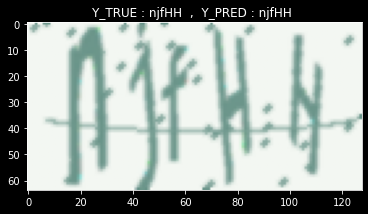

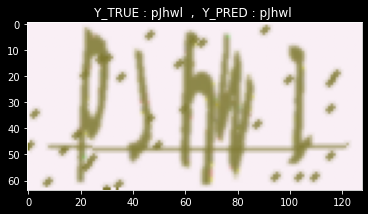

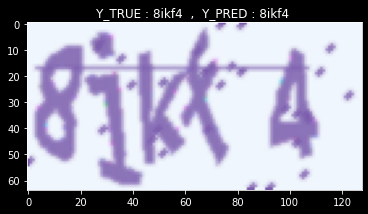

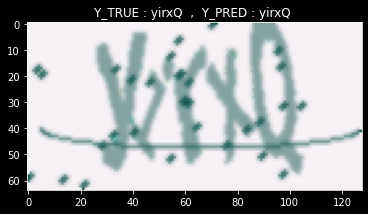

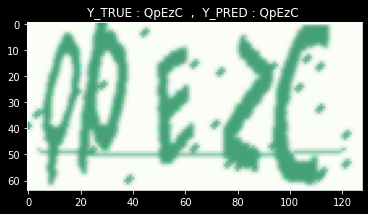

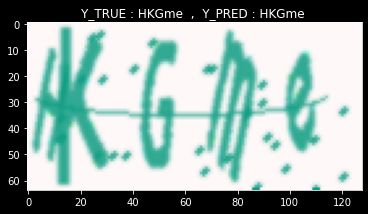

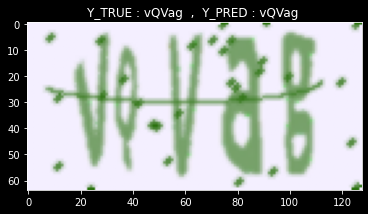

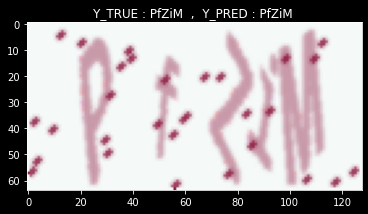

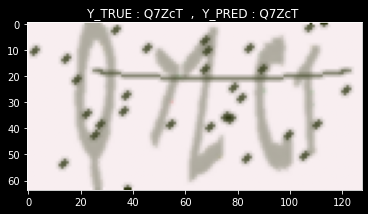

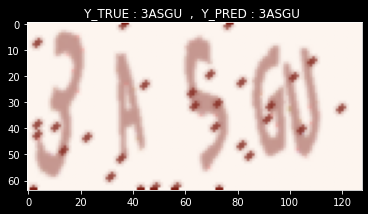

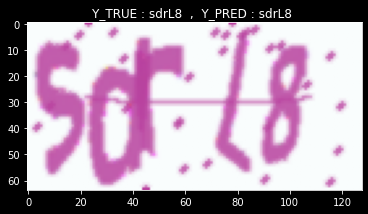

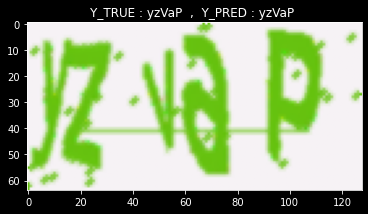

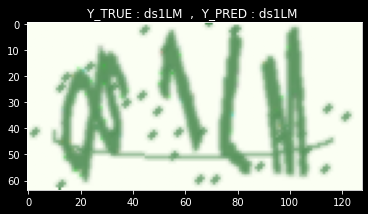

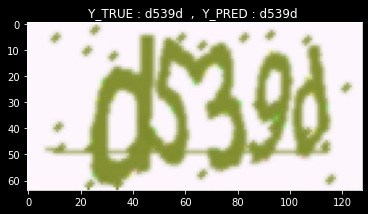

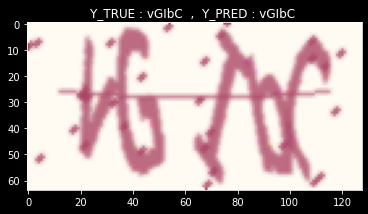

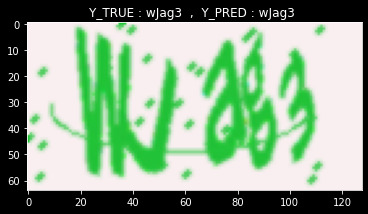

In [22]:
y_val,y_pred=CNN_Model_Test(model,Test_data,characters)

In [23]:
y_val=np.array(y_val)
y_pred=np.array(y_pred)

In [24]:
y_val.shape,y_pred.shape

((100, 5), (100, 5))

In [25]:
y_val[:10,:]

array([[54, 14, 22, 11, 25],
       [47, 25,  5, 50,  5],
       [13, 45, 38,  7, 19],
       [ 5,  1,  3, 26, 37],
       [22, 40, 41, 34, 21],
       [18, 41, 43, 39, 20],
       [53, 53, 56, 46, 33],
       [57, 20, 40,  2, 53],
       [ 8, 36, 27, 48, 39],
       [58, 11,  0, 61, 33]])

In [26]:
y_pred[:10,:]

array([[54, 14, 22, 11, 25],
       [47, 25,  5, 50,  5],
       [13, 45, 38,  7, 19],
       [ 5,  1,  3, 26, 37],
       [22, 40, 41, 34, 21],
       [18, 41, 43, 39, 20],
       [53, 53, 56, 46, 33],
       [57, 20, 40,  2, 53],
       [ 8, 36, 27, 48, 39],
       [58, 11,  0, 61, 33]])

##### Calculation  of Metrics

In [27]:
from Utils_funX import evaluate_metrics

In [28]:
model.metrics_names

[]

In [29]:
Model_metrics=pd.read_csv("CNN_Model_Epochs.csv")

In [30]:
Model_metrics

epoch  dense_1_accuracy  dense_1_loss  dense_2_accuracy  dense_2_loss  \
0       0          0.984961      0.041670          0.984563      0.043671   
1       1          0.986195      0.037246          0.985422      0.039851   
2       2          0.986984      0.035378          0.986313      0.036445   
3       3          0.987328      0.034303          0.987312      0.033962   
4       4          0.987969      0.033256          0.987781      0.032831   
5       5          0.987914      0.033192          0.987758      0.033171   
6       6          0.988758      0.030700          0.987805      0.033167   
7       7          0.988453      0.031006          0.988227      0.031516   
8       8          0.988359      0.031100          0.988367      0.030972   
9       9          0.989086      0.029618          0.988656      0.030730   
10     10          0.989273      0.029785          0.989172      0.029527   
11     11          0.989531      0.028241          0.989008      0.029383   
12     12          0.989367      0.028773          0.989336      0.028662   
13     13          0.990086      0.027025          0.989781      0.027586   
14     14          0.989625      0.027606          0.989180      0.028539   
15     15          0.990086      0.027106          0.989688      0.027691   
16     16          0.989633      0.027733          0.990094      0.026576   
17     17          0.990781      0.025481          0.989867      0.026826   
18     18          0.990422      0.025050          0.990555      0.025836   
19     19          0.990898      0.024584          0.990680      0.025307   
20     20          0.990953      0.024575          0.990609      0.025203   
21     21          0.991406      0.023272          0.990570      0.025147   

    dense_3_accuracy  dense_3_loss  dense_4_accuracy  dense_4_loss  \
0           0.985227      0.041548          0.989398      0.028270   
1           0.986586      0.036351          0.989977      0.026207   
2           0.986320      0.036312          0.990906      0.024200   
3           0.988023      0.032521          0.991164      0.023507   
4           0.988437      0.031679          0.991523      0.022719   
5           0.988070      0.032923          0.991734      0.022143   
6           0.988594      0.031324          0.991922      0.021459   
7           0.988781      0.030153          0.992078      0.021120   
8           0.989250      0.029270          0.991844      0.021127   
9           0.989047      0.029106          0.991914      0.020382   
10          0.989141      0.028887          0.992031      0.020654   
11          0.989438      0.028319          0.992523      0.019969   
12          0.990078      0.027004          0.992773      0.019219   
13          0.989539      0.027685          0.993258      0.018089   
14          0.989758      0.027626          0.992898      0.018819   
15          0.990844      0.025124          0.992867      0.018820   
16          0.990367      0.026230          0.993016      0.018298   
17          0.990586      0.025466          0.992586      0.019052   
18          0.990430      0.026227          0.993133      0.018186   
19          0.990672      0.025351          0.993008      0.018043   
20          0.990672      0.024762          0.993094      0.018135   
21          0.990508      0.025518          0.993148      0.017736   

    dense_accuracy  ...  val_dense_1_loss  val_dense_2_accuracy  \
0         0.988594  ...          0.036171              0.985000   
1         0.989578  ...          0.036068              0.985547   
2         0.990102  ...          0.038262              0.985391   
3         0.990937  ...          0.030388              0.985156   
4         0.990898  ...          0.028257              0.988672   
5         0.990781  ...          0.033724              0.987109   
6         0.991391  ...          0.031015              0.988750   
7         0.991680  ...          0.029969              0.989375   
8         0.992133

##### Overall Accuracy

In [31]:
print("The overall Accuracy is : ",evaluate_metrics(model,characters))

100%|██████████| 100/100 [01:21<00:00,  1.22it/s]

The overall Accuracy is :  0.95578125


##### THANK YOU 